## Exercise 1 - pandas repetition

### 0.Working with national test data

#### a) Start with reading in the file riket2023_åk9_np.xlsx and the sheets for the different subjects.

In [15]:
import pandas as pd

national_test_file_path = "data/riket2023_åk9_np.xlsx"

sheet_names = pd.ExcelFile(national_test_file_path).sheet_names
# iterate through names
# read each sheet into a dictionary of dataframes
df_dict = {}
for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel(
        national_test_file_path, skiprows=8, sheet_name=sheet_name
        )

df_dict.keys()


dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

In [16]:
df_dict["Engelska"]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [17]:
df_dict["Matematik"]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [19]:
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

#### b) change name of columns

In [20]:
# b) Change the column names to get something similar to this:
# Plats	Huvudman	Totalt (A-F)	Flickor (A-F)	Pojkar (A-F)	
#                   Totalt (A-E)	Flickor (A-E)	Pojkar (A-E)	
#                   Totalt (poäng)	Flickor (poäng)	Pojkar (poäng)

df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [22]:
import numpy as np
postfixes = [""]*2 + [" (A-F)"]*3 + [" (A-E)"]*3 + [" (poäng)"]*3


postfixes
print(np.array(postfixes).shape)
# it is possible to add arrays in python, but they need to have equally many elements
for subject in subjects:
    print(np.array(df_dict[subject].columns.str.strip()).shape)

(11,)
(11,)
(11,)
(11,)
(11,)


In [111]:
# addition by element
df_dict["Engelska"].columns.str.strip() + np.array(postfixes) 

test = df_dict["Engelska"].columns.str.strip() + np.array(postfixes)
np.array(test).shape

(11,)

In [23]:
from copy import deepcopy
# to make the for loop idempotent, I make a new, clean version of the dictionary
df_dict_cleaned = deepcopy(df_dict) # deepcopy gives a new address in memory!

for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes) 
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject].rename(
        {"Riket" : "Plats", "Typ av huvudman" : "Huvudman"},inplace=True, axis=1
        )

In [24]:
df_dict_cleaned["Matematik"].columns

Index(['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)',
       'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)',
       'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [25]:
df_dict_cleaned["Matematik"][["Huvudman", "Totalt (poäng)"]]

,Huvudman,Totalt (poäng)
0,Samtliga,11.9
1,Kommunal,11.6
2,Enskild,13.0
3,Skolverket,14.1


#### c) Do some initial exploratory data analysis on this dataset. Use methods such as:
- info, value_counts, columns, describe and some more to get a first insight into the dataset.

In [ ]:
# subjects ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

In [27]:
df_dict_cleaned["Matematik"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plats            4 non-null      object 
 1   Huvudman         4 non-null      object 
 2   Totalt (A-F)     4 non-null      int64  
 3   Flickor (A-F)    4 non-null      int64  
 4   Pojkar (A-F)     4 non-null      int64  
 5   Totalt (A-E)     4 non-null      object 
 6   Flickor (A-E)    4 non-null      object 
 7   Pojkar (A-E)     4 non-null      object 
 8   Totalt (poäng)   4 non-null      float64
 9   Flickor (poäng)  4 non-null      float64
 10  Pojkar (poäng)   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [31]:
df_dict_cleaned["Matematik"].columns

Index(['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', 'Pojkar (A-F)',
       'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (poäng)',
       'Flickor (poäng)', 'Pojkar (poäng)'],
      dtype='object')

In [33]:
df_dict_cleaned["Matematik"].value_counts()

Plats  Huvudman    Totalt (A-F)  Flickor (A-F)  Pojkar (A-F)  Totalt (A-E)  Flickor (A-E)  Pojkar (A-E)  Totalt (poäng)  Flickor (poäng)  Pojkar (poäng)
Riket  Enskild     22553         11137          11416         92.9          92.2           93.5          13.0            12.8             13.1              1
       Kommunal    84163         40386          43777         88.1          87.7           88.5          11.6            11.5             11.7              1
       Samtliga    106766        51548          55218         89.1          88.7           89.5          11.9            11.8             12.0              1
       Skolverket  50            25             25            ~100          ~100           ~100          14.1            13.5             14.7              1
Name: count, dtype: int64

In [26]:
df_dict_cleaned["Matematik"].describe().transpose()
# transpose() swaps columns with rows

,count,mean,std,min,25%,50%,75%,max
Totalt (A-F),4.0,53383.000,50305.900509,50.0,16927.250,53358.00,89813.750,106766.0
Flickor (A-F),4.0,25774.000,24187.203159,25.0,8359.000,25761.50,43176.500,51548.0
Pojkar (A-F),4.0,27609.000,26119.924770,25.0,8568.250,27596.50,46637.250,55218.0
Totalt (poäng),4.0,12.650,1.138713,11.6,11.825,12.45,13.275,14.1
Flickor (poäng),4.0,12.400,0.920145,11.5,11.725,12.30,12.975,13.5
Pojkar (poäng),4.0,12.875,1.357387,11.7,11.925,12.55,13.500,14.7


#### d) amount of students that got F in math

In [35]:
# Totalt (A-F) - all students in a Huvudman
# Totalt (A-E) - % students that have passed in a Huvudman

# pick Huvudman Samtliga

df_math = df_dict_cleaned["Matematik"]
df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [36]:
# one way is to use duckdb

import duckdb

total_students = duckdb.query(
    """
    SELECT "Totalt (A-F)"
    FROM df_math
    WHERE huvudman = 'Samtliga'
"""
).df().values[0][0]

total_students

np.int64(106766)

In [37]:
# another way is to use pandas

students_passed = df_math.query("Huvudman == 'Samtliga'")["Totalt (A-E)"]*.01*total_students

students_passed

0    95128.506
Name: Totalt (A-E), dtype: object

In [38]:
students_failed = total_students - students_passed
round(students_failed[0])

11637

## e) Draw a bar chart on the total points for each of the subjects

In [152]:
total_points = {}

# {
# Engelska : ..., Matte: ... , Svenska: ..., SVA: ...}
# }

# matplotlib bar plot, x = keys, height = points

df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]

np.float64(15.7)

In [156]:
for subject in subjects:
    total_points[subject]= df_dict_cleaned[subject].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]

total_points

{'Engelska': np.float64(15.7),
 'Matematik': np.float64(11.9),
 'Svenska': np.float64(13.6),
 'Svenska som andraspråk': 9.4}

['Engelska', 'Matematik', 'Svenska', 'SvA']


[Text(0.5, 0, 'Ämne'),
 Text(0, 0.5, 'Genomsnitt poäng'),
 Text(0.5, 1.0, 'Genomsnitt poäng för olika ämnen på NP för samtliga huvudmän')]

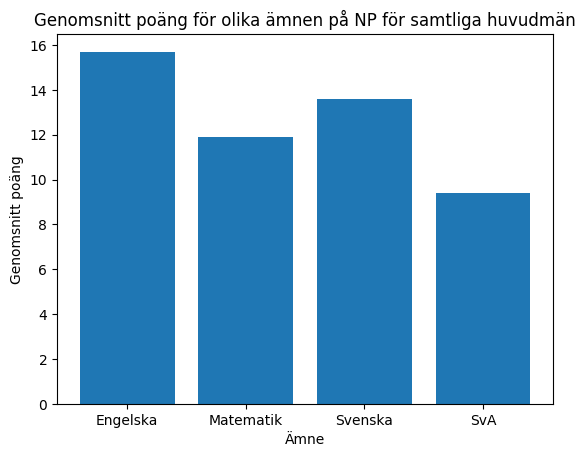

In [167]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.bar(x = total_points.keys(), height=total_points.values())

subjects[-1]="SvA"
print(subjects)

ax.set_xticks(labels=subjects, ticks=range(len(subjects)))
ax.set(xlabel="Ämne", ylabel="Genomsnitt poäng", 
       title="Genomsnitt poäng för olika ämnen på NP för samtliga huvudmän")